In [2]:
#구현 파일 실행시키기
%run cnn_reg_model.ipynb
%run dataset_adam_animalface.ipynb

In [3]:
#실험용 데이터셋 객체 생성  //  이미지해상도 [96,96], 신경망 입력 형태 [96,96,3]으로 지정
#이미지 해상도를 [96,96]으로 한 이유는 여러 단계의 풀링 계층을 거치면서 짜투리 없는 분할이 쉬운 숫자를 택한 것
#신경망 입력 형태[96,96,3]의 3차원 형태로 지정한 것은 신경망 입력이 다층 퍼셉트론을 위한 2차원 행렬 모양이 아닌
#합성곱 신경망을 위한 4차원 텐서가 되도록 하기 위함 -> 실제학습 때 신경망 입력은 미니배치 축이 추가되어 합성곱 신경망의 처리에 적합한 4차원 형태로 준비됌
aad = Adam_animalfaceDataset([96, 96], [96, 96, 3])

Model animalface_model_1 train started:
    Epoch 2: cost=2.297, accuracy=0.547+0.215/0.620+0.230 (30/30 secs)
    Epoch 4: cost=2.294, accuracy=0.547+0.215/0.600+0.220 (23/53 secs)
    Epoch 6: cost=2.294, accuracy=0.547+0.218/0.590+0.190 (23/76 secs)
    Epoch 8: cost=2.293, accuracy=0.547+0.205/0.600+0.160 (23/99 secs)
    Epoch 10: cost=2.293, accuracy=0.547+0.218/0.600+0.190 (25/124 secs)
Model animalface_model_1 train ended in 124 secs:
Model animalface_model_1 test report: accuracy = 0.600+0.245, (1 secs)

Model animalface_model_1 Visualization


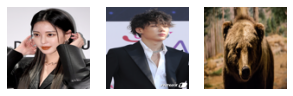

[ 도메인 추정결과 ]
추정확률분포 [45,55] => 추정 person_face : 정답 person_face => O
추정확률분포 [45,55] => 추정 person_face : 정답 person_face => O
추정확률분포 [45,55] => 추정 person_face : 정답 animal_face => X
[ 얼굴상 추정결과 ]
추정확률분포 [18,22,17,22,21] => 추정 dog_face : 정답 cat_face => X
추정확률분포 [18,22,17,22,21] => 추정 dog_face : 정답 rabbit_face => X
추정확률분포 [18,22,17,22,21] => 추정 dog_face : 정답 bear_face => X


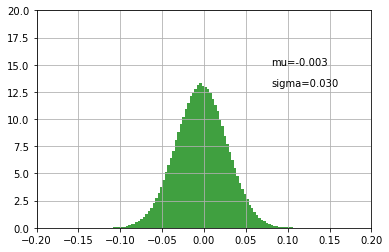

Near 0 parameters =  0.0%(222/829810)


In [4]:
#베이스라인 모델의 파라미터 분포 확인
aam1 = CnnRegModel('animalface_model_1', aad, [30,10])
aam1.exec_all(epoch_count=10, report=2, show_params=True)

Model animalface_model_2 train ended in 534 secs:
Model animalface_model_2 test report: accuracy = 0.600+0.245, (1 secs)



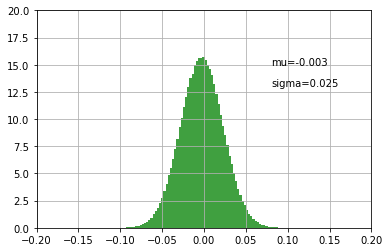

Near 0 parameters =  0.0%(270/829810)


In [5]:
#L2손실의 효과와 파라미터 분포의 변화 확인
#히스토그램에서 보이는 것처럼 0을 중심으로 파라미터값이 확연하게 모여들면서 평균이 -0.003, 표준편차가 0.025로 변화함
#L2손실이 적용되면서 표준편차 감소가 1/10도 안되게 크게 줄음 -> 전체적으로 파라미터들의 절댓값이 크게 줄었음을 의미
aam2 = CnnRegModel('animalface_model_2', aad, [30,10], l2_decay=0.1)
aam2.exec_all(epoch_count=10, show_cnt=0, show_params=True)

Model animalface_model_3 train ended in 653 secs:
Model animalface_model_3 test report: accuracy = 0.600+0.245, (1 secs)



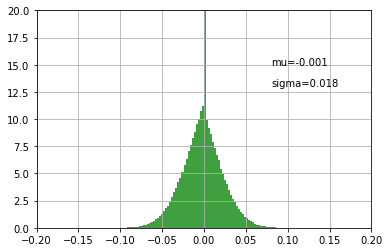

Near 0 parameters = 43.8%(363763/829810)


In [6]:
#L1손실의 효과와 파라미터 분포의 변화 확인
#히스토그램 모야이 비틀린 모양으로 변화했고,파라미터들의 표준편차가 0.018로 줄어들고 0 부분의 확률밀도가 매우 커짐
#전체 파라미터의 43.8%가 0에 가까운 값을 갖는 것으로 나타남 -> L1손실이 확실한 효과를 발휘하고 있음을 보임
aam3 = CnnRegModel('animalface_model_3', aad, [30,10], l1_decay=0.01)
aam3.exec_all(epoch_count=10, show_cnt=0, show_params=True)

Model animalface_cnn_1 train started:
    Epoch 2: cost=1.875, accuracy=0.829+0.367/0.790+0.290 (123/123 secs)
    Epoch 4: cost=1.507, accuracy=0.896+0.494/0.840+0.410 (122/245 secs)
    Epoch 6: cost=1.256, accuracy=0.930+0.584/0.870+0.350 (123/368 secs)
    Epoch 8: cost=1.045, accuracy=0.949+0.645/0.850+0.460 (135/503 secs)
    Epoch 10: cost=0.827, accuracy=0.964+0.722/0.880+0.390 (132/635 secs)
Model animalface_cnn_1 train ended in 635 secs:
Model animalface_cnn_1 test report: accuracy = 0.899+0.403, (20 secs)

Model animalface_cnn_1 Visualization


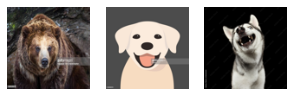

[ 도메인 추정결과 ]
추정확률분포 [97, 3] => 추정 animal_face : 정답 animal_face => O
추정확률분포 [81,19] => 추정 animal_face : 정답 animal_face => O
추정확률분포 [94, 6] => 추정 animal_face : 정답 animal_face => O
[ 얼굴상 추정결과 ]
추정확률분포 [70, 7, 3,18, 2] => 추정 bear_face : 정답 bear_face => O
추정확률분포 [21, 6, 3,70, 0] => 추정 dog_face : 정답 dog_face => O
추정확률분포 [ 9,20, 1,69, 1] => 추정 dog_face : 정답 dog_face => O


In [7]:
#베이스라인 합성곱 신경망의 성능 확인(CNN)
#드롭아웃,잡음 주입, 배치 정규화의 세 가지 계층들을 이용할 때와의 성능 비교를 위해 먼저 정규화 기법을 적용하지 않은 신경망의 성능 확인
cnn1 = [['conv',{'ksize':3, 'chn':6}],
        ['max',{'stride':2}],
        ['conv',{'ksize':3, 'chn':12}],
        ['max',{'stride':2}],
        ['conv',{'ksize':3, 'chn':24}],
        ['avg',{'stride':3}]]
acnn1 = CnnRegModel('animalface_cnn_1', aad, cnn1)
acnn1.exec_all(epoch_count=10, report=2)

In [8]:
#드롭아웃 기법의 동작과 효과 확인
#합성곱 계층과 풀링 계층의 처리가 끝날 때마다 60%만 살리고 나머지 40%를 0으로 만들어 걸러내는 드롭아웃 계층을 삽입
#정확도가 89.9% -> 89.3%로 떨어짐 학습 과정에 일부러 부담을 주는 것이기 때문 하지만 크게 떨어지진 않음
#드롭아웃의 초기 부담을 극복하고 더 나은 결과를 얻어내려면 더 많은 학습 횟수가 필요하며 모델의 용량을 일부 늘리는 방안도 생각해볼 수 있다.
cnn2 = [['conv',{'ksize':3, 'chn':6}],
        ['max',{'stride':2}],
        ['dropout', {'keep_prob':0.6}],
        ['conv',{'ksize':3, 'chn':12}],
        ['max',{'stride':2}],
        ['dropout', {'keep_prob':0.6}],
        ['conv',{'ksize':3, 'chn':24}],
        ['avg',{'stride':3}],
        ['dropout', {'keep_prob':0.6}]]
acnn2 = CnnRegModel('animalface_cnn_2', aad, cnn2)
acnn2.exec_all(epoch_count=10, report=2, show_cnt=0)

Model animalface_cnn_2 train started:
    Epoch 2: cost=2.181, accuracy=0.701+0.262/0.790+0.210 (130/130 secs)
    Epoch 4: cost=1.928, accuracy=0.813+0.342/0.850+0.340 (123/253 secs)
    Epoch 6: cost=1.805, accuracy=0.856+0.380/0.860+0.440 (124/377 secs)
    Epoch 8: cost=1.711, accuracy=0.861+0.421/0.850+0.400 (121/498 secs)
    Epoch 10: cost=1.596, accuracy=0.880+0.458/0.860+0.460 (125/623 secs)
Model animalface_cnn_2 train ended in 623 secs:
Model animalface_cnn_2 test report: accuracy = 0.893+0.403, (9 secs)



In [10]:
#잡음 주입 기법의 동작과 효과 확인
#잡음 주입 모델의 학습 진행은 베이스라인과 앞서거니 뒤서거니 하는 모습을 보이며 손실값 또한 계속 하락하고 있다.
#주입되는 잡음크기를 잘 바꾸어보고 학습 횟수를 적절히 늘리면 베이스라인의 결과를 넘어서는 좋은 결과를 거둘 수 있을것으로 기대된다.
noise_std = 0.01
cnn3 = [['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':6}],
        ['max',{'stride':2}],
        ['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':12}],
        ['max',{'stride':2}],
        ['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':24}],
        ['avg',{'stride':3}]]
acnn3 = CnnRegModel('animalface_cnn_3', aad, cnn3)
acnn3.exec_all(epoch_count=10, report=2, show_cnt=0)

Model animalface_cnn_3 train started:
    Epoch 2: cost=1.839, accuracy=0.853+0.355/0.830+0.290 (138/138 secs)
    Epoch 4: cost=1.490, accuracy=0.909+0.483/0.870+0.340 (136/274 secs)
    Epoch 6: cost=1.216, accuracy=0.940+0.573/0.870+0.420 (129/403 secs)
    Epoch 8: cost=0.980, accuracy=0.958+0.668/0.890+0.370 (130/533 secs)
    Epoch 10: cost=0.767, accuracy=0.967+0.742/0.880+0.360 (126/659 secs)
Model animalface_cnn_3 train ended in 659 secs:
Model animalface_cnn_3 test report: accuracy = 0.866+0.409, (8 secs)



Model animalface_cnn_4 train started:
    Epoch 2: cost=1.681, accuracy=0.881+0.420/0.660+0.240 (151/151 secs)
    Epoch 4: cost=1.390, accuracy=0.919+0.525/0.550+0.240 (136/287 secs)
    Epoch 6: cost=1.199, accuracy=0.941+0.585/0.540+0.230 (131/418 secs)
    Epoch 8: cost=1.067, accuracy=0.950+0.623/0.780+0.340 (135/553 secs)
    Epoch 10: cost=0.991, accuracy=0.949+0.667/0.740+0.360 (339/892 secs)
Model animalface_cnn_4 train ended in 892 secs:
Model animalface_cnn_4 test report: accuracy = 0.758+0.370, (15 secs)

Model animalface_cnn_4 Visualization


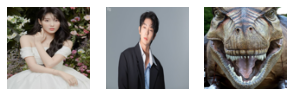

[ 도메인 추정결과 ]
추정확률분포 [53,47] => 추정 animal_face : 정답 person_face => X
추정확률분포 [ 1,99] => 추정 person_face : 정답 person_face => O
추정확률분포 [100, 0] => 추정 animal_face : 정답 animal_face => O
[ 얼굴상 추정결과 ]
추정확률분포 [ 0,43,49, 3, 5] => 추정 dinosaur_face : 정답 dog_face => X
추정확률분포 [12,30,24, 7,27] => 추정 cat_face : 정답 cat_face => O
추정확률분포 [36,12,27, 7,18] => 추정 bear_face : 정답 dinosaur_face => X


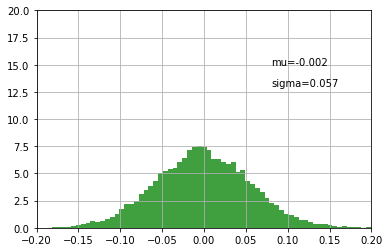

Near 0 parameters =  0.0%(1/14154)


In [12]:
#배치 정규화 기법의 동작과 효과 확인
#베이스라인보다 상당히 떨어진 75.8%의 정확도가 나타났다.
#배치 정규화 처리는 합성곱 계층 안에 삽입되어 선형 연산과 비선형 활성화 함수의 중간에서 작동하는 편이 더 나은 결과를 낸다는 견해도 있다.->그 방법은 9장에서
cnn4 = [['batch_normal'],
        ['conv',{'ksize':3, 'chn':6}],
        ['max',{'stride':2}],
        ['batch_normal'],
        ['conv',{'ksize':3, 'chn':12}],
        ['max',{'stride':2}],
        ['batch_normal'],
        ['conv',{'ksize':3, 'chn':24}],
        ['avg',{'stride':3}]]
acnn4 = CnnRegModel('animalface_cnn_4', aad, cnn4)
acnn4.exec_all(epoch_count=10, report=2, show_params=True)

Model animalface_cnn_5 train started:
    Epoch 2: cost=1.798, accuracy=0.868+0.358/0.860+0.380 (145/145 secs)
    Epoch 4: cost=1.430, accuracy=0.928+0.492/0.880+0.470 (162/307 secs)
    Epoch 6: cost=1.200, accuracy=0.939+0.593/0.890+0.430 (144/451 secs)
    Epoch 8: cost=0.938, accuracy=0.966+0.681/0.900+0.460 (163/614 secs)
    Epoch 10: cost=0.732, accuracy=0.982+0.747/0.890+0.390 (147/761 secs)
Model animalface_cnn_5 train ended in 761 secs:
Model animalface_cnn_5 test report: accuracy = 0.907+0.382, (8 secs)

Model animalface_cnn_5 Visualization


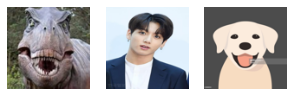

[ 도메인 추정결과 ]
추정확률분포 [98, 2] => 추정 animal_face : 정답 animal_face => O
추정확률분포 [ 0,100] => 추정 person_face : 정답 person_face => O
추정확률분포 [100, 0] => 추정 animal_face : 정답 animal_face => O
[ 얼굴상 추정결과 ]
추정확률분포 [12,12,53, 6,17] => 추정 dinosaur_face : 정답 dinosaur_face => O
추정확률분포 [ 0, 1,95, 1, 3] => 추정 dinosaur_face : 정답 rabbit_face => X
추정확률분포 [11,71, 9, 9, 1] => 추정 cat_face : 정답 dog_face => X


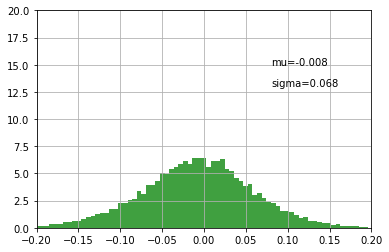

Near 0 parameters =  0.0%(2/14154)


In [4]:
#드롭아웃은 새로운 데이터의 양을 늘려야하기 때문에 적절하지않았고 잡음주입이 잡음의 크기와 학습횟수의 변경으로도 정확도가 변하는 것을
#쉽게 볼 수 있어 잡음 주입으로 선택해보았다.
#잡음 주입의 크기를 높여보았을 경우 86.6% -> 90.7%로 정확도가 올랐다.
noise_std = 0.1
cnn5 = [['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':6}],
        ['max',{'stride':2}],
        ['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':12}],
        ['max',{'stride':2}],
        ['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':24}],
        ['avg',{'stride':3}]]
acnn5 = CnnRegModel('animalface_cnn_5', aad, cnn5)
acnn5.exec_all(epoch_count=10, report=2, show_params=True)

Model animalface_cnn_5 train started:
    Epoch 2: cost=1.882, accuracy=0.834+0.351/0.870+0.340 (146/146 secs)
    Epoch 4: cost=1.504, accuracy=0.904+0.500/0.880+0.340 (157/303 secs)
    Epoch 6: cost=1.188, accuracy=0.944+0.602/0.860+0.430 (147/450 secs)
    Epoch 8: cost=0.905, accuracy=0.970+0.694/0.890+0.340 (141/591 secs)
    Epoch 10: cost=0.677, accuracy=0.980+0.768/0.900+0.400 (133/724 secs)
    Epoch 12: cost=0.481, accuracy=0.994+0.821/0.890+0.380 (136/860 secs)
    Epoch 14: cost=0.402, accuracy=0.989+0.862/0.890+0.420 (131/991 secs)
    Epoch 16: cost=0.234, accuracy=0.989+0.929/0.880+0.370 (135/1126 secs)
    Epoch 18: cost=0.226, accuracy=0.995+0.927/0.860+0.470 (132/1258 secs)
    Epoch 20: cost=0.161, accuracy=0.992+0.948/0.860+0.430 (132/1390 secs)
    Epoch 22: cost=0.061, accuracy=0.999+0.980/0.890+0.410 (137/1527 secs)
    Epoch 24: cost=0.125, accuracy=0.998+0.954/0.870+0.430 (134/1661 secs)
    Epoch 26: cost=0.173, accuracy=0.991+0.946/0.890+0.430 (134/1795 secs

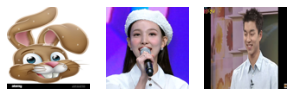

[ 도메인 추정결과 ]
추정확률분포 [100, 0] => 추정 animal_face : 정답 animal_face => O
추정확률분포 [ 4,96] => 추정 person_face : 정답 person_face => O
추정확률분포 [ 0,100] => 추정 person_face : 정답 person_face => O
[ 얼굴상 추정결과 ]
추정확률분포 [ 0, 0, 0, 2,98] => 추정 rabbit_face : 정답 rabbit_face => O
추정확률분포 [100, 0, 0, 0, 0] => 추정 bear_face : 정답 rabbit_face => X
추정확률분포 [ 0,20, 0,80, 0] => 추정 dog_face : 정답 dinosaur_face => X


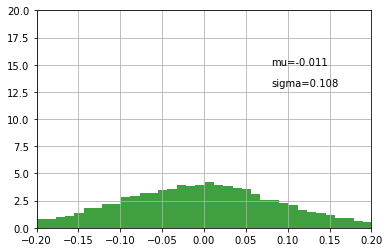

Near 0 parameters =  0.0%(1/14154)


In [5]:
noise_std = 0.1
cnn5 = [['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':6}],
        ['max',{'stride':2}],
        ['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':12}],
        ['max',{'stride':2}],
        ['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':24}],
        ['avg',{'stride':3}]]
acnn5 = CnnRegModel('animalface_cnn_5', aad, cnn5)
acnn5.exec_all(epoch_count=50, report=2, show_params=True)

Model animalface_cnn_6 train started:
    Epoch 2: cost=1.911, accuracy=0.822+0.344/0.810+0.300 (127/127 secs)
    Epoch 4: cost=1.535, accuracy=0.900+0.469/0.910+0.390 (126/253 secs)
    Epoch 6: cost=1.277, accuracy=0.940+0.572/0.890+0.360 (127/380 secs)
    Epoch 8: cost=1.040, accuracy=0.957+0.647/0.900+0.430 (132/512 secs)
    Epoch 10: cost=0.765, accuracy=0.968+0.753/0.920+0.380 (129/641 secs)
Model animalface_cnn_6 train ended in 641 secs:
Model animalface_cnn_6 test report: accuracy = 0.916+0.433, (7 secs)

Model animalface_cnn_6 Visualization


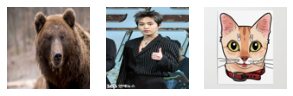

[ 도메인 추정결과 ]
추정확률분포 [99, 1] => 추정 animal_face : 정답 animal_face => O
추정확률분포 [ 0,100] => 추정 person_face : 정답 person_face => O
추정확률분포 [100, 0] => 추정 animal_face : 정답 animal_face => O
[ 얼굴상 추정결과 ]
추정확률분포 [56, 5, 4,27, 7] => 추정 bear_face : 정답 bear_face => O
추정확률분포 [47, 3, 3, 3,44] => 추정 bear_face : 정답 cat_face => X
추정확률분포 [ 1,96, 0, 0, 3] => 추정 cat_face : 정답 cat_face => O


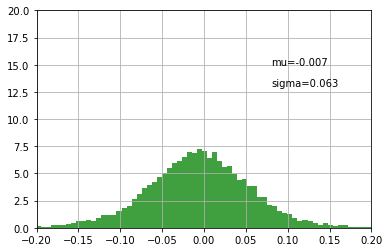

Near 0 parameters =  0.0%(1/14154)


In [5]:
#잡음을 0.001로 낮췄을 때 
noise_std = 0.001
cnn6 = [['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':6}],
        ['max',{'stride':2}],
        ['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':12}],
        ['max',{'stride':2}],
        ['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':24}],
        ['avg',{'stride':3}]]
acnn6 = CnnRegModel('animalface_cnn_6', aad, cnn6)
acnn6.exec_all(epoch_count=10, report=2, show_params=True)

Model animalface_cnn_7 train started:
    Epoch 5: cost=1.439, accuracy=0.922+0.519/0.880+0.370 (324/324 secs)
    Epoch 10: cost=0.857, accuracy=0.977+0.710/0.920+0.380 (315/639 secs)
    Epoch 15: cost=0.426, accuracy=0.991+0.854/0.890+0.350 (314/953 secs)
    Epoch 20: cost=0.202, accuracy=0.993+0.936/0.860+0.400 (320/1273 secs)
    Epoch 25: cost=0.192, accuracy=0.993+0.944/0.870+0.390 (320/1593 secs)
    Epoch 30: cost=0.149, accuracy=0.993+0.954/0.860+0.440 (338/1931 secs)
    Epoch 35: cost=0.025, accuracy=1.000+0.996/0.900+0.350 (372/2303 secs)
    Epoch 40: cost=0.001, accuracy=1.000+1.000/0.870+0.430 (324/2627 secs)
    Epoch 45: cost=0.001, accuracy=1.000+1.000/0.850+0.440 (357/2984 secs)
    Epoch 50: cost=0.000, accuracy=1.000+1.000/0.850+0.420 (332/3316 secs)
Model animalface_cnn_7 train ended in 3316 secs:
Model animalface_cnn_7 test report: accuracy = 0.928+0.421, (8 secs)

Model animalface_cnn_7 Visualization


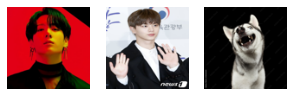

[ 도메인 추정결과 ]
추정확률분포 [ 0,100] => 추정 person_face : 정답 person_face => O
추정확률분포 [ 0,100] => 추정 person_face : 정답 person_face => O
추정확률분포 [100, 0] => 추정 animal_face : 정답 animal_face => O
[ 얼굴상 추정결과 ]
추정확률분포 [ 0, 0,98, 2, 0] => 추정 dinosaur_face : 정답 rabbit_face => X
추정확률분포 [ 0,100, 0, 0, 0] => 추정 cat_face : 정답 dinosaur_face => X
추정확률분포 [ 0, 0, 0,100, 0] => 추정 dog_face : 정답 dog_face => O


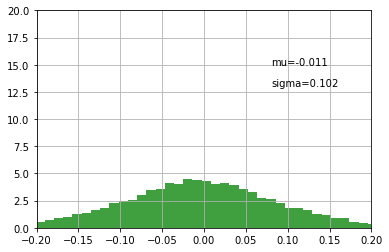

Near 0 parameters =  0.0%(3/14154)


In [6]:
#잡음을 0.001로 낮췄을 때 정확도가 조금은 상승함 도메인:92.8%, 얼굴상:42.1%
#----->잡음을 낮췄을 때가 높였을 때보다 비교적 좋게 나옴
noise_std = 0.001
cnn7 = [['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':6}],
        ['max',{'stride':2}],
        ['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':12}],
        ['max',{'stride':2}],
        ['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':24}],
        ['avg',{'stride':3}]]
acnn7 = CnnRegModel('animalface_cnn_7', aad, cnn7)
acnn7.exec_all(epoch_count=50, report=5, show_params=True)

Model animalface_cnn_8 train started:
    Epoch 10: cost=0.852, accuracy=0.966+0.718/0.870+0.330 (682/682 secs)
    Epoch 20: cost=0.157, accuracy=0.998+0.951/0.900+0.360 (649/1331 secs)
    Epoch 30: cost=0.291, accuracy=0.982+0.918/0.900+0.360 (658/1989 secs)
    Epoch 40: cost=0.001, accuracy=1.000+1.000/0.870+0.400 (636/2625 secs)
    Epoch 50: cost=0.000, accuracy=1.000+1.000/0.880+0.340 (631/3256 secs)
    Epoch 60: cost=0.000, accuracy=1.000+1.000/0.880+0.340 (640/3896 secs)
    Epoch 70: cost=0.000, accuracy=1.000+1.000/0.870+0.330 (662/4558 secs)
    Epoch 80: cost=0.000, accuracy=1.000+1.000/0.870+0.360 (639/5197 secs)
    Epoch 90: cost=0.000, accuracy=1.000+1.000/0.890+0.380 (657/5854 secs)
    Epoch 100: cost=0.000, accuracy=1.000+1.000/0.870+0.350 (632/6486 secs)
Model animalface_cnn_8 train ended in 6486 secs:
Model animalface_cnn_8 test report: accuracy = 0.916+0.463, (9 secs)

Model animalface_cnn_8 Visualization


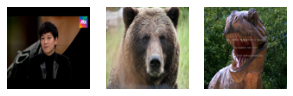

[ 도메인 추정결과 ]
추정확률분포 [ 0,100] => 추정 person_face : 정답 person_face => O
추정확률분포 [100, 0] => 추정 animal_face : 정답 animal_face => O
추정확률분포 [73,27] => 추정 animal_face : 정답 animal_face => O
[ 얼굴상 추정결과 ]
추정확률분포 [65,35, 0, 0, 0] => 추정 bear_face : 정답 cat_face => X
추정확률분포 [100, 0, 0, 0, 0] => 추정 bear_face : 정답 bear_face => O
추정확률분포 [ 0, 0, 0, 0,100] => 추정 rabbit_face : 정답 dinosaur_face => X


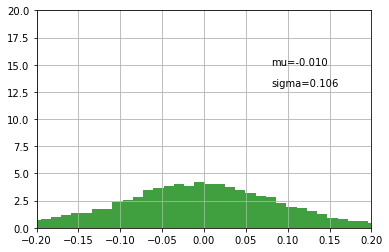

Near 0 parameters =  0.0%(1/14154)


In [7]:
#잡음의 크기는 낮춘상태에서 학습횟수를 늘려보니 도메인: 91.6%, 얼굴상: 46.3%의 정확도가 보임
#학습회수의 의해 점점 얼굴상의 정확도가 높아짐을 보임
noise_std = 0.001
cnn8 = [['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':6}],
        ['max',{'stride':2}],
        ['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':12}],
        ['max',{'stride':2}],
        ['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':24}],
        ['avg',{'stride':3}]]
acnn8 = CnnRegModel('animalface_cnn_8', aad, cnn8)
acnn8.exec_all(epoch_count=100, report=10, show_params=True)